# Example Notebook for GaussBean Analysis

To start, let's import the submodules that we want to use into the file and specify the path to a dataset that we want to do our analysis on:

In [1]:
# I'm just going to import some packages that come in handy in this notebook, but you can feel free to exclude these in your own code if you don't need them
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# import all of the submodules for the useful utilities
from gaussbean.analysis import dataset, single

# let's go ahead and specify the path of the image that we want to run all of our analysis on (the following path DOES NOT have to be the same as yours)
imgpath = "dataset/1.tif" # ----> replace this path with "path/to/your/image.tif"
datapath = "dataset" # ----> replace this path with "path/to/your/dataset/"

## Single Image Analysis

First, we can focus on just single image analysis using the GaussBean package. Using this, it makes it easy to troubleshoot the full dataset analysis function (shown below). You can check the cropping on singular images in your dataset (by setting the "imgpath" variable above), and also check the FWHM values for each axis. You can do this for either prjections or lineouts.

In [2]:
# finds the FWHM of both transverse dimensions as well as the cropped image for troubleshooting. This algorithm uses PROJECTIONS
xFWHMp, yFWHMp, croppedimagep = single.single_image_proj(xmargins=200, ymargins=200, imgpath=imgpath)

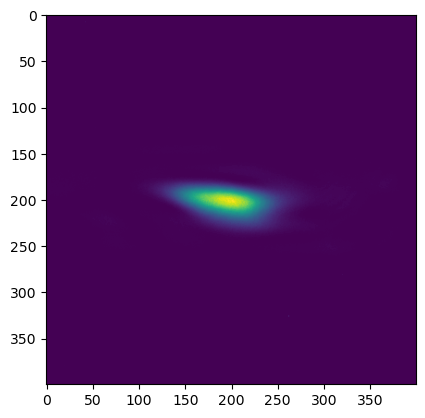

In [3]:
# can plot the cropped image and use this for troubleshooting (in case the algorithm is, for some reason, having issues with cropping
plt.imshow(croppedimagep)

In [4]:
# finds the FWHM of both transverse dimensions as well as the cropped image for troubleshooting. This algorithm uses LINEOUTS
xFWHMl, yFWHMl, croppedimagel = single.single_image_line(xmargins=200, ymargins=200, xpixel=200, ypixel=200, toavg=0, imgpath=imgpath)

If we show the values returned for the FWHM of both transverse axes, we should find that the values returned by lineouts and projections are *very* similar if not the same:

In [5]:
# comparing the FWHM values of the x-axis
print(f"FWHM value for x-dimension (projection): {xFWHMp}")
print(f"FWHM value for x-dimension (lineout): {xFWHMl}")

FWHM value for x-dimension (projection): 74.59954142947504
FWHM value for x-dimension (lineout): 74.5


In [6]:
# comparing the FWHM values for the y-axis
print(f"FWHM value for y-dimension (projection): {yFWHMp}")
print(f"FWHM value for y-dimension (lineout): {yFWHMl}")

FWHM value for y-dimension (projection): 24.888270249482048
FWHM value for y-dimension (lineout): 24.75


## Dataset Analysis

Moving on to full-dataset analysis, the function that performs this analysis just runs through a for loop for the entire list of images that you input, and runs either the lineout or projection version of the single-image analysis based on what you specify.

In [7]:
# need to change the directory to the directory of the dataset you want to analyze (ONLY RUN THIS ONCE, otherwise, restart the kernel)
os.chdir(datapath)

In [8]:
# organize the images out of the directory into a list (if this throws an error, you have a hidden file in this directory)
img_list = os.listdir(os.getcwd())
img_list = sorted(img_list, key=lambda i: int(os.path.splitext(os.path.basename(i))[0]))

# let's print this out to see the result
print(img_list)

['1.tif', '2.tif', '3.tif', '4.tif', '5.tif', '6.tif', '7.tif', '8.tif', '9.tif', '10.tif', '11.tif', '12.tif', '13.tif', '14.tif', '15.tif', '16.tif', '17.tif', '18.tif', '19.tif', '20.tif', '21.tif']


Now that all of the organization is done for the dataset, we can perform some analysis on it. Note that there are two functions, one for projection analysis, and the other for lineout analysis. With lineout analysis, you can specify whether or not you'd like to use the centroid for your lineout or not.

On the plots that are performed down below, the axes are incorrect. The full dataset functions return FWHM values in terms of pixels, not microns. I simply left the plots this way such that you can see the formatting for Greek symbols in plots, like mu. Also, note that the laser axis is not currently in microns either. You can either change the axes labels of the plot, or change the "xvals" list such that everything is in microns, how it should be.

In [9]:
# perform the full dataset analysis with projections
xFWHMfullp, yFWHMfullp, croppedimagefullp = dataset.full_set_proj(img_list, xmargins=200, ymargins=200)

Text(0.5, 0, 'Laser axis ($\\mu$m)')

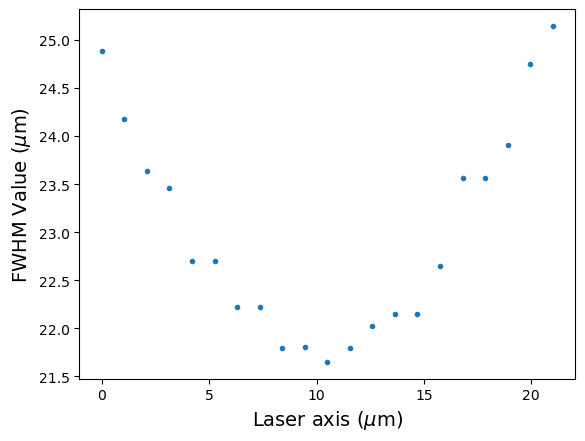

In [22]:
# create an array that spans the entire x-axis. This must have the same length as the images in your dataset
xvals = np.linspace(0, 21, 21)

# create a scatter plot of the xvals array we made above and the FWHM values along the y-axis of each image
plt.scatter(xvals, yFWHMfullp, marker='.')
# plt.scatter(xvals, xFWHMfullp, marker='.')  # --> you can also use this to plot both x- and y- FWHM results on the same plot

# do some nice plot titling things
plt.ylabel(r"FWHM Value ($\mu$m)", fontsize=14)
plt.xlabel(r"Laser axis ($\mu$m)", fontsize=14)

Now, we can do the same thing for lineouts. If you don't specify a certain x and y pixel at which to take lineouts on each axis, the function will automatically use the centroid of the image. As you can see, this kind of changes the shape of the plot, so make sure you know *exactly* what you want to use here.

In [32]:
# perform the full dataset analysis with lineouts
xFWHMfulll, yFWHMfulll, croppedimagefulll = dataset.full_set_line(img_list, xmargins=200, ymargins=200, xpixel=200, ypixel=225)

Text(0.5, 0, 'Laser axis ($\\mu$m)')

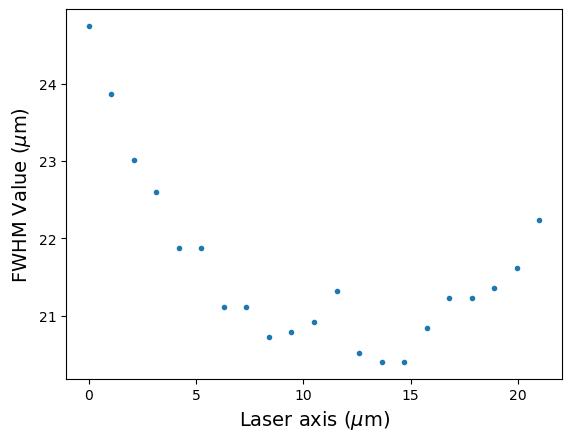

In [30]:
# create a scatter plot of the xvals array we made above and the FWHM values along the y-axis of each image
plt.scatter(xvals, yFWHMfulll, marker='.')
# plt.scatter(xvals, xFWHMfulll, marker='.')  # --> you can also use this to plot both x- and y- FWHM results on the same plot

# do some nice plot titling things
plt.ylabel(r"FWHM Value ($\mu$m)", fontsize=14)
plt.xlabel(r"Laser axis ($\mu$m)", fontsize=14)

## Fitting the Dataset

The waist fits are coming soon!